In [78]:
include("PVCR.jl");

## Change in residential tariff with new rules. No PV
### Consumer 275 kWh/month

In [79]:
PVRes.capacity = 0.0
residential.econsumption = 275; get_pmax(residential);
ebalance = annual_energy_balance(residential, PVRes, print_output=false);

In [80]:
ebalance[1]["utility_balance"]

Dict{String,Float64} with 6 entries:
  "consumer_energy_night"  => 101.166
  "consumer_energy_valley" => 93.7068
  "consumer_energy_peak"   => 77.2898
  "grid_energy_night"      => 101.166
  "grid_energy_peak"       => 77.2898
  "grid_energy_valley"     => 93.7068

In [81]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], residential, print_output=false)
end

In [82]:
bills_residential2 = Dict()
residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], residential; print_output=false, tax_cutoff = 0.0)
end

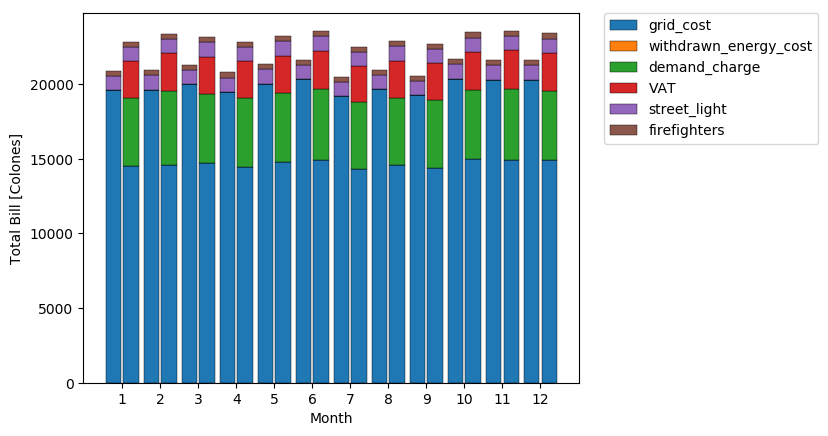

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [83]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])

In [84]:
bills_residential1[1]["savings"]

Dict{String,Any} with 5 entries:
  "demand_charges"      => 0.0
  "street_light"        => -4.54747e-13
  "VAT"                 => 0.0
  "grid_energy_savings" => -7.27596e-12
  "firefighters"        => -1.13687e-13

## Change in residential tariff with new rules. PV System installed
### Consumer 275 kWh/month 1 kW PV System

In [85]:
PVRes.capacity = 1.0
residential.tariff = R_CNFL
ebalance = annual_energy_balance(residential, PVRes, print_output=false);

In [86]:
bills_residential1 = Dict()
for m in 1:12
    bills_residential1[m] = monthly_bill(ebalance[m], residential, print_output=false)
end

In [87]:
bills_residential2 = Dict()
residential.tariff = A_R_CNFL
for m in 1:12
    bills_residential2[m] = monthly_bill(ebalance[m], residential; print_output=false, tax_cutoff = 0.0)
end

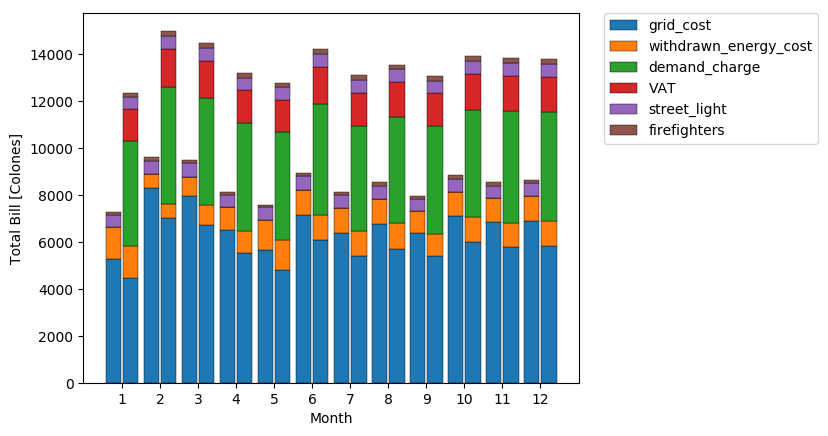

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [88]:
plot_bill(bills_residential1, bills_residential2, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"])

In [ ]:
keys(ebalance[1]["utility_balance"])

In [ ]:
cum_sum = Array{Float64,1}(undef, 12)
for i in 1:length(fields)
    var = [bill[m]["$(fields[i])"] for m in 1:12]
    bar(collect(1:12), bottom = cum_sum, var, label="$(fields[i])")
    cum_sum += var
end